In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

credits_df = pd.read_pickle('data/credits.p')
#print(credits_df.info(memory_usage='deep'))
# print(credits_df.shape)
#%timeit cast_credits_df = pd.read_pickle('data/cast_credits.p')
cast_credits_df = pd.read_pickle('data/cast_credits.p')
#print(cast_credits_df.head(2))
print(cast_credits_df.columns)
crew_credits_df = pd.read_pickle('data/crew_credits.p')
#print(crew_credits_df.head(2))
print(crew_credits_df.columns)
#print(crew_credits_df.columns)
keywords_df = pd.read_pickle('data/keywords.p')
print(keywords_df.head(1))
print(keywords_df.columns)
links_df = pd.read_pickle('data/links.p')
print(links_df.columns)
links_small_df = pd.read_pickle('data/links_small.p')
print(links_small_df.columns)
movies_metadata_df = pd.read_pickle('data/movies_metadata.p')
print(movies_metadata_df.columns)
ratings_small_df = pd.read_pickle('data/ratings_small.p')
print(ratings_small_df.columns)

Index(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order',
       'profile_path', 'tmdbId'],
      dtype='object')
Index(['credit_id', 'department', 'gender', 'id', 'job', 'name',
       'profile_path', 'tmdbId'],
      dtype='object')
   tmdbId                                           keywords
0     862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
Index(['tmdbId', 'keywords'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'imdbId', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='obj

en    32269
fr     2438
it     1529
ja     1350
de     1080
Name: original_language, dtype: int64


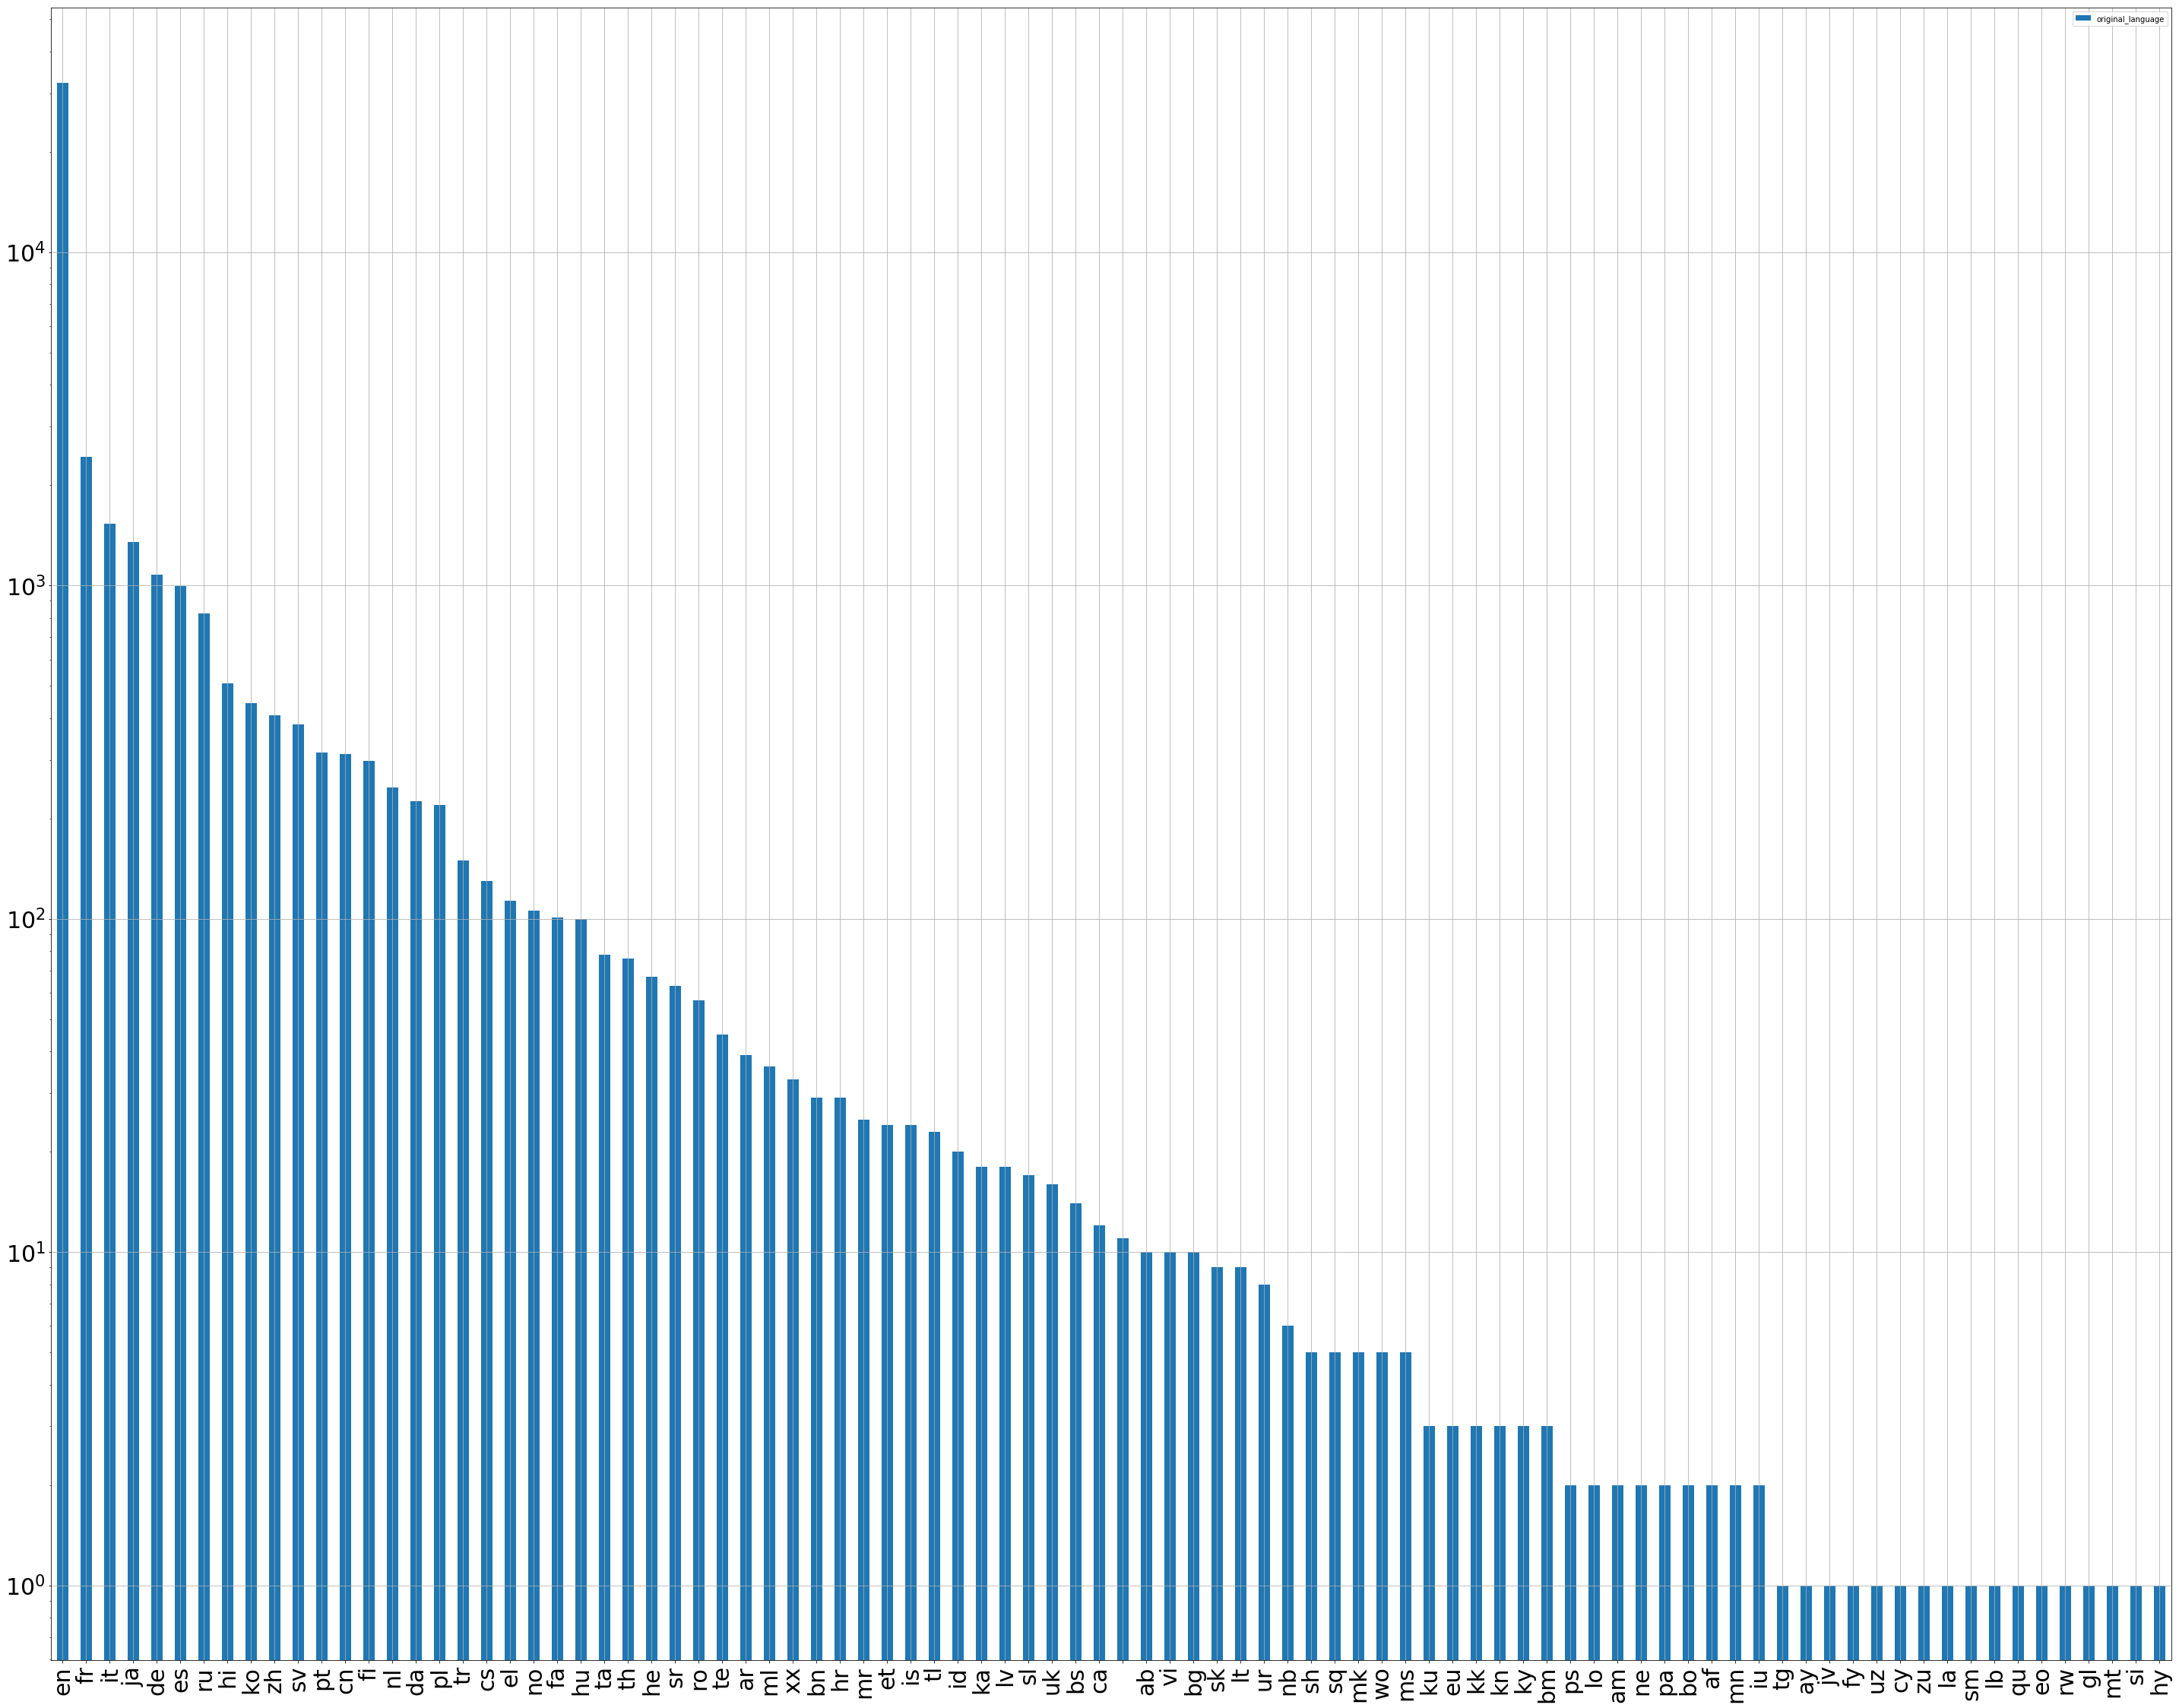

In [6]:
#print(movies_metadata_df[['title', 'original_language']])
print(movies_metadata_df['original_language'].value_counts().nlargest(5))

df = movies_metadata_df; # [movies_metadata_df.original_language != 'en']
max = df['original_language'].value_counts().max()
pd.DataFrame(df['original_language'].value_counts(), columns=['original_language']).plot.bar(figsize=(50,40));
plt.xticks(fontsize=30);
plt.yticks(np.arange(0, max, 50), fontsize=30);
plt.grid();
plt.yscale('log')
plt.figure();

                      budget
original_language           
                         0.0
ab                       0.0
af                 3000000.0
am                       0.0
ar                 3700000.0
ay                       0.0
bg                  796442.0
bm                 2000000.0
bn                       0.0
bo                 1200000.0


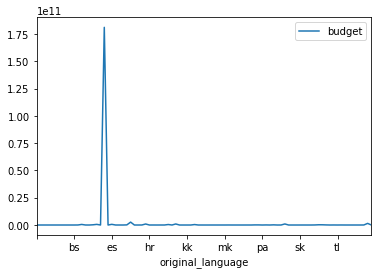

In [4]:
sum_df = movies_metadata_df[['original_language', 'budget']].groupby('original_language').sum()
print(sum_df.head(10))
sum_df.plot()

# factorize returns key, labets
movies_metadata_df['original_language_index'] = pd.factorize(movies_metadata_df.original_language)[0]


In [ ]:
print(cast_credits_df['gender'].value_counts())
print(crew_credits_df['gender'].value_counts())
# max = cast_credits_df['gender'].value_counts().max()
# pd.DataFrame(cast_credits_df['gender'].value_counts(), columns=['gender']).plot.bar(figsize=(50,40));
# plt.xticks(fontsize=30);
# plt.yticks(fontsize=30);
# #plt.yticks(np.arange(0, max), fontsize=30);
# plt.grid();
# plt.figure();



In [22]:
movies_metadata_df[movies_metadata_df['popularity'] > 90]['title']

292                                          Pulp Fiction
536                                          Blade Runner
12481                                     The Dark Knight
14551                                              Avatar
23675                                           Gone Girl
24351                                           John Wick
24455                                          Big Hero 6
24873               The Hunger Games: Mockingjay - Part 1
26560    Pirates of the Caribbean: Dead Men Tell No Tales
26564                                            Deadpool
26566                      Guardians of the Galaxy Vol. 2
26567                          Captain America: Civil War
30700                                             Minions
33356                                        Wonder Woman
42222                                Beauty and the Beast
43644                                         Baby Driver
44274                      War for the Planet of the Apes
Name: title, d

In [61]:
import io
from pandas.io.json import json_normalize

pd.set_option('display.max_colwidth', -1)
#movies_metadata_df['production_countries']
json_normalize(movies_metadata_df['production_countries'][320]).values

array([['CA', 'Canada'],
       ['US', 'United States of America']], dtype=object)

In [65]:
movies_metadata_df.production_countries.apply(json.loads)

TypeError: the JSON object must be str, bytes or bytearray, not 'list'